<center>
<div class="alert alert-block alert-info">
<h1>Exploratory Data Analysis</h1>
    </div>

<a id=menu></a>
## Menu
* [Imports](#imports)
* [Read in Data](#read_file)
* [Customer Cohorts](#customer_cohorts)  
     *[Cusotmer Retension](#customer_retension)  
     *[Cohorts by Quantity](#cohort_quantity)  
* [Recency, Frequency, Monetary Value](#rfm)
* [Summary](#summary)



<a id='imports'></a>
### Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

#turn off warnings
import warnings
warnings.filterwarnings('ignore')

<a id=read_file></a>
### Read File

In [2]:
data_path = '../cleaned_data'

file_path = data_path + '/clean_sales_df.csv' 

In [3]:
dates = ['InvoiceDate']
data = pd.read_csv(file_path,index_col=0,header=0,parse_dates = dates)

In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Revenue,Year,Month,Day,Quarter,Week,Week_day,Day_of_year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 00:00:00,83.4,2009,12,1,4,49,1,335
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 00:00:00,81.0,2009,12,1,4,49,1,335
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 00:00:00,81.0,2009,12,1,4,49,1,335
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 00:00:00,100.8,2009,12,1,4,49,1,335
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 00:00:00,30.0,2009,12,1,4,49,1,335


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770386 entries, 0 to 1067369
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      770386 non-null  int64         
 1   StockCode    770386 non-null  object        
 2   Description  770386 non-null  object        
 3   Quantity     770386 non-null  int64         
 4   InvoiceDate  770386 non-null  datetime64[ns]
 5   Price        770386 non-null  float64       
 6   Customer ID  770386 non-null  float64       
 7   Country      770386 non-null  object        
 8   Date         770386 non-null  object        
 9   Revenue      770386 non-null  float64       
 10  Year         770386 non-null  int64         
 11  Month        770386 non-null  int64         
 12  Day          770386 non-null  int64         
 13  Quarter      770386 non-null  int64         
 14  Week         770386 non-null  int64         
 15  Week_day     770386 non-null  int

In [6]:
data.shape

(770386, 17)

[back to menu](#menu)

<a id = customer_cohorts></a>
### Customer Cohorts

In [7]:
#make a copy of data to work with
df_cohort = data.copy()
df_cohort.shape

(770386, 17)

>How many customers are there?

In [8]:
print('The number of customers = ',df_cohort.groupby('Customer ID')['Customer ID'].count().count())

The number of customers =  5834


>create a new column for all the order months

In [9]:
"""extracts the month from the date column, takes in a date returns the month so it can be 
    subtracted from invoice month

parameters:
    takes in the date  
Returns:
    year and month from date, the day will be the first day of month
"""
def get_month(d):  
    return datetime.datetime(d.year,d.month,1)

df_cohort['order_month'] = df_cohort['InvoiceDate'].apply(get_month)


In [10]:
df_cohort.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Revenue,Year,Month,Day,Quarter,Week,Week_day,Day_of_year,order_month
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09 00:00:00,10.20,2011,12,9,4,49,4,343,2011-12-01
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 00:00:00,12.60,2011,12,9,4,49,4,343,2011-12-01
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 00:00:00,16.60,2011,12,9,4,49,4,343,2011-12-01
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 00:00:00,16.60,2011,12,9,4,49,4,343,2011-12-01
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09 00:00:00,14.85,2011,12,9,4,49,4,343,2011-12-01


>Time based cohorts, group customers based on the month they made their first purchase

In [11]:
#group by customer id and invoice_month to find the month the customers made their first purchace
df_cohort['cohort_month'] = df_cohort.groupby('Customer ID')['order_month'].transform('min')#use transform to get back the same dataframe with first date
df_cohort.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Revenue,Year,Month,Day,Quarter,Week,Week_day,Day_of_year,order_month,cohort_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 00:00:00,83.4,2009,12,1,4,49,1,335,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 00:00:00,81.0,2009,12,1,4,49,1,335,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 00:00:00,81.0,2009,12,1,4,49,1,335,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 00:00:00,100.8,2009,12,1,4,49,1,335,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 00:00:00,30.0,2009,12,1,4,49,1,335,2009-12-01,2009-12-01


> I need to create the cohort index which is the number of months since the first invoice, so I have to extract the month and year from the invoice

In [12]:
"""Extract the year and month from invoice 

parameter:
    Takes in the dataframe and the column that has the date where year and month need to be extracted
    
Returns:
    Year, month, and day that are assigned to objects
"""
#create a function that extracts the year and month from invoice and cohort months
def get_date(df,col):
    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day
    return year,month,day

In [13]:

invoice_year,invoice_month,_ = get_date(df_cohort,'order_month')
cohort_year,cohort_month,_ = get_date(df_cohort,'cohort_month')


In [14]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

df_cohort['cohort_index'] = year_diff*12 + month_diff +1

In [22]:
df_cohort.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,Revenue,Year,Month,Day,Quarter,Week,Week_day,Day_of_year,order_month,cohort_month,cohort_index
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 00:00:00,83.4,2009,12,1,4,49,1,335,2009-12-01,2009-12-01,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 00:00:00,81.0,2009,12,1,4,49,1,335,2009-12-01,2009-12-01,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 00:00:00,81.0,2009,12,1,4,49,1,335,2009-12-01,2009-12-01,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 00:00:00,100.8,2009,12,1,4,49,1,335,2009-12-01,2009-12-01,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 00:00:00,30.0,2009,12,1,4,49,1,335,2009-12-01,2009-12-01,1


In [23]:
#group by cohort_month and cohort_index and count the number of unique customers in each cohort
groups = df_cohort.groupby(['cohort_month','cohort_index'])
cohorts = groups['Customer ID'].nunique()
cohorts = cohorts.reset_index()

cohorts.head()

,cohort_month,cohort_index,Customer ID
0,2009-12-01,1,949
1,2009-12-01,2,330
2,2009-12-01,3,317
3,2009-12-01,4,403
4,2009-12-01,5,359


>It is better to do the same thing using functions, that way I can choose the period for cohorts

In [24]:
"""
Function takes a dataframe of transactions and returns aquisition cohort and order cohort, which can be
used in customer analysis and cohort analysis matrix

cohort_month is customer aquisition month
order_month is when customer makes an order

parameters:
    Takes in a dataframe, required columns are customer id and invoice date, 
    also takes in a period which takes values M (monthly), Q (quaterly), Y (yearly)
Returns:
    A dataframe with customer id, invoiceDate cohort_month (or month of aquisition), order_month 
    
    
"""
def get_cohort(df,period='M'):
    df = df[['Customer ID', 'InvoiceDate']]
    df = df.assign(cohort_month=df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period(period))
    df = df.assign(order_month=df['InvoiceDate'].dt.to_period(period))
    return df
                

In [25]:
get_cohort(data,'M').head()

,Customer ID,InvoiceDate,cohort_month,order_month
0,13085.0,2009-12-01 07:45:00,2009-12,2009-12
1,13085.0,2009-12-01 07:45:00,2009-12,2009-12
2,13085.0,2009-12-01 07:45:00,2009-12,2009-12
3,13085.0,2009-12-01 07:45:00,2009-12,2009-12
4,13085.0,2009-12-01 07:45:00,2009-12,2009-12


In [26]:
#import attrgtter to obtain the integer values of subtracting date periods 
from operator import attrgetter

"""calculates the retention of customers in each month after aquisition and returns count of customers in each month

parameters:
    dataframe that has purchase history for customers
    period either M, Q
    
Returns:
    A dataframe with customer_count, invoiceDate cohort_month (or month of aquisition), order_month and cohort_index or period
"""
def get_retention(df, period = 'M'):
    df= get_cohort(df,period).groupby(['cohort_month','order_month']).agg({
                                        'Customer ID':'nunique'}).reset_index(drop=False)
           
    df['cohort_index'] = df['order_month'] - df['cohort_month']
           
    #Subtraction of a Period from another Period will give a DateOffset, which looks like  <0 * MonthEnds>, not of an integer 
    #so I need to apply attrgetter which will return the integer for the period         
    df['cohort_index'] = df['cohort_index'].apply(attrgetter('n'))+1 # n stands for numeric value and +1 so index starts at 1 instead of 0
    df.rename(columns={'Customer ID':'customer_count'},inplace=True)
    return df[['cohort_month','cohort_index','customer_count']]

In [27]:
#copy the dataframe incase there is an error
df_cohort2 = data.copy()


In [28]:
#call get_retention function on dataframe
cohort2 = get_retention(df_cohort2,'M')
cohort2

,cohort_month,cohort_index,customer_count
0,2009-12,1,949
1,2009-12,2,330
2,2009-12,3,317
3,2009-12,4,403
4,2009-12,5,359
...,...,...,...
320,2011-10,2,70
321,2011-10,3,35
322,2011-11,1,190
323,2011-11,2,27


In [29]:
#compare new dataframe cohort2 to cohort dataframe created earlier
cohorts

,cohort_month,cohort_index,Customer ID
0,2009-12-01,1,949
1,2009-12-01,2,330
2,2009-12-01,3,317
3,2009-12-01,4,403
4,2009-12-01,5,359
...,...,...,...
320,2011-10-01,2,70
321,2011-10-01,3,35
322,2011-11-01,1,190
323,2011-11-01,2,27


>they are exactly identical

[Back to Menu](#menu)

<a id = customer_retension></a>
### Customer Retension, or Time Based Cohorts


>Time based cohorts groups customers by specific time frames.   
>To create the cohort dataframe pivot the cohorts dataframe with starting_month as index, the cohort_index as columns 
and unique number of customer id as values


In [30]:
counts = cohort2.pivot(index='cohort_month',columns='cohort_index',values='customer_count')

counts

cohort_index,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
cohort_month,,,,,,,,,,,,,,,,,,,,,
2009-12,949.0,330.0,317.0,403.0,359.0,342.0,358.0,327.0,321.0,344.0,...,287.0,248.0,288.0,269.0,245.0,242.0,297.0,289.0,385.0,187.0
2010-01,364.0,76.0,116.0,116.0,99.0,113.0,97.0,85.0,105.0,118.0,...,55.0,87.0,75.0,71.0,74.0,91.0,73.0,91.0,21.0,NaN
2010-02,375.0,88.0,85.0,109.0,92.0,74.0,72.0,108.0,96.0,103.0,...,76.0,60.0,61.0,54.0,86.0,86.0,63.0,22.0,NaN,NaN
2010-03,441.0,83.0,100.0,107.0,100.0,90.0,106.0,136.0,122.0,48.0,...,74.0,77.0,68.0,79.0,90.0,93.0,34.0,NaN,NaN,NaN
2010-04,292.0,55.0,56.0,46.0,53.0,66.0,81.0,77.0,32.0,31.0,...,46.0,42.0,43.0,53.0,67.0,17.0,NaN,NaN,NaN,NaN
2010-05,254.0,40.0,43.0,46.0,45.0,64.0,55.0,32.0,16.0,21.0,...,32.0,36.0,41.0,40.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06,266.0,47.0,50.0,55.0,62.0,76.0,34.0,24.0,22.0,30.0,...,33.0,35.0,54.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,189.0,29.0,34.0,55.0,56.0,25.0,22.0,28.0,28.0,21.0,...,32.0,44.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,163.0,32.0,48.0,54.0,27.0,19.0,17.0,21.0,23.0,20.0,...,33.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#calculate the retention rate
cohort_size = counts.iloc[:,0]
retention = counts.divide(cohort_size,axis=0)
retention = retention.round(3)

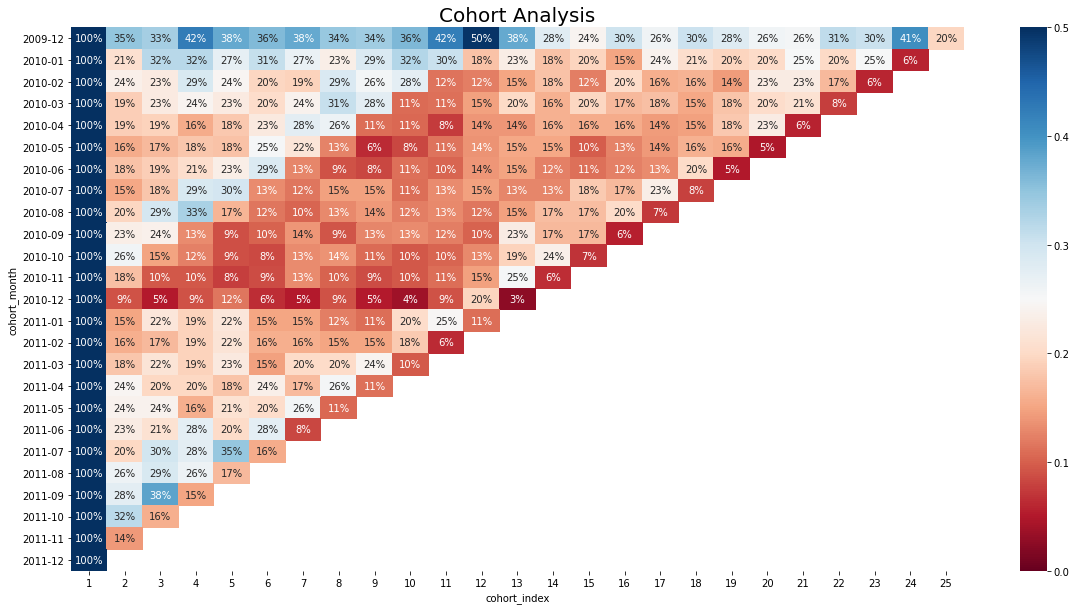

In [32]:
#to see customer churn in two years
plt.figure(figsize=(20,10))
plt.title('Cohort Analysis', fontsize=20)
sns.heatmap(retention,
            annot=True,
           fmt='.0%',
           vmin=0,
           vmax=0.5,
           cmap='RdBu');

>From the heatmap it appears that customer retention went down at the end of year 2010, maybe the store introduced a feature to their website that the customers did not like.

In [33]:
#calculate quarterly cohorts
cohort_q = get_retention(df_cohort2,'Q')
cohort_q.head()

,cohort_month,cohort_index,customer_count
0,2009Q4,1,949
1,2009Q4,2,597
2,2009Q4,3,616
3,2009Q4,4,562
4,2009Q4,5,662


In [34]:
counts_q = cohort_q.pivot(index='cohort_month',columns='cohort_index',values='customer_count')
counts_q

cohort_index,1,2,3,4,5,6,7,8,9
cohort_month,,,,,,,,,
2009Q4,949.0,597.0,616.0,562.0,662.0,470.0,472.0,458.0,532.0
2010Q1,1180.0,606.0,578.0,597.0,435.0,441.0,455.0,416.0,NaN
2010Q2,812.0,318.0,357.0,178.0,252.0,231.0,252.0,NaN,NaN
2010Q3,588.0,270.0,151.0,153.0,188.0,184.0,NaN,NaN,NaN
2010Q4,772.0,159.0,187.0,164.0,272.0,NaN,NaN,NaN,NaN
2011Q1,375.0,150.0,121.0,133.0,NaN,NaN,NaN,NaN,NaN
2011Q2,328.0,140.0,126.0,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,393.0,201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
retention_q = counts_q.divide(counts_q.iloc[:,0],axis=0)
#retention_q = retention_q * 100

In [36]:
retention_q

cohort_index,1,2,3,4,5,6,7,8,9
cohort_month,,,,,,,,,
2009Q4,1.0,0.629083,0.649104,0.592202,0.697576,0.495258,0.497366,0.482613,0.56059
2010Q1,1.0,0.513559,0.489831,0.505932,0.368644,0.373729,0.385593,0.352542,NaN
2010Q2,1.0,0.391626,0.439655,0.219212,0.310345,0.284483,0.310345,NaN,NaN
2010Q3,1.0,0.459184,0.256803,0.260204,0.319728,0.312925,NaN,NaN,NaN
2010Q4,1.0,0.205959,0.242228,0.212435,0.352332,NaN,NaN,NaN,NaN
2011Q1,1.0,0.400000,0.322667,0.354667,NaN,NaN,NaN,NaN,NaN
2011Q2,1.0,0.426829,0.384146,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,1.0,0.511450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


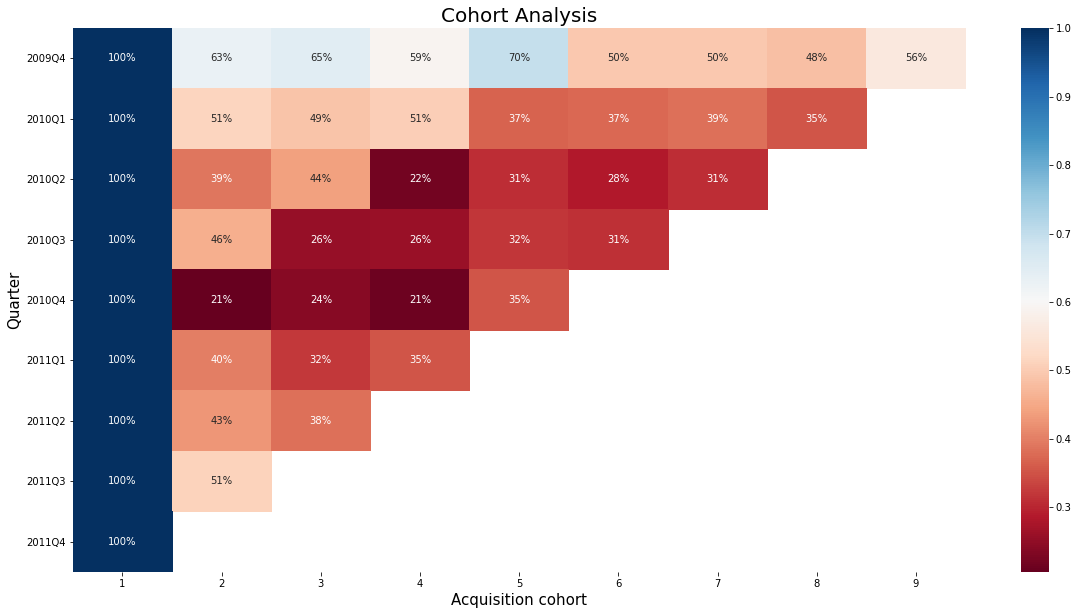

In [37]:
#to see quarterly customer churn 
plt.figure(figsize=(20,10))
plt.title('Cohort Analysis', fontsize=20)
sns.heatmap(retention_q ,
            annot=True,
          fmt='.0%',
           cmap='RdBu',
           square=False)
plt.xlabel("Acquisition cohort",fontsize=15)
plt.ylabel("Quarter",fontsize=15)
plt.yticks(rotation=3600);

[Back to Menu](#menu)

<a id = cohort_quantity></a>
### Cohorts by Quantity

>Find cohorts for qunatity

In [154]:
#use groups where data is grouped by starting month and cohort index
cohorts_quantity = groups['Quantity'].sum()
cohorts_quantity = cohorts_quantity.reset_index()
cohorts_quantity
counts_quantity = cohorts_quantity.pivot(index='cohort_month', columns='cohort_index',values='Quantity')
counts_quantity.index = pd.Series(counts_quantity.index).dt.date
counts_quantity

cohort_index,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
cohort_month,,,,,,,,,,,,,,,,,,,,,
2009-12-01,392472.0,275121.0,242017.0,319699.0,167677.0,183920.0,182367.0,160980.0,183083.0,231294.0,...,144614.0,101833.0,148857.0,156632.0,136320.0,170962.0,206308.0,221923.0,253576.0,93342.0
2010-01-01,90736.0,24863.0,29525.0,37909.0,34978.0,34116.0,28929.0,31717.0,32337.0,45860.0,...,20876.0,30089.0,23808.0,34105.0,30009.0,33604.0,34037.0,32824.0,4160.0,NaN
2010-02-01,98515.0,19515.0,35028.0,36941.0,25341.0,24392.0,24594.0,30651.0,29891.0,29191.0,...,21182.0,16895.0,23880.0,14305.0,27231.0,25707.0,20559.0,6791.0,NaN,NaN
2010-03-01,128066.0,24904.0,31525.0,42994.0,30128.0,39969.0,42138.0,54540.0,49306.0,16192.0,...,18554.0,27603.0,26563.0,30301.0,29370.0,35716.0,10452.0,NaN,NaN,NaN
2010-04-01,72928.0,9252.0,11163.0,14334.0,14470.0,17268.0,20656.0,18571.0,6137.0,10019.0,...,13232.0,12152.0,11810.0,15394.0,18577.0,3111.0,NaN,NaN,NaN,NaN
2010-05-01,77802.0,7383.0,8007.0,9334.0,9250.0,18985.0,12711.0,4464.0,3770.0,4369.0,...,9072.0,14894.0,12535.0,10439.0,1712.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,79650.0,9198.0,15370.0,16301.0,23234.0,34270.0,8785.0,10555.0,16107.0,18716.0,...,13568.0,18874.0,17598.0,2660.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,42378.0,4592.0,8017.0,14232.0,15536.0,5389.0,4905.0,5980.0,5899.0,5423.0,...,10506.0,11686.0,3836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,39300.0,6392.0,10514.0,12602.0,8648.0,3230.0,3336.0,3493.0,8619.0,7541.0,...,12100.0,4037.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
#% of quantity
quantity_size = counts_quantity.iloc[:,0]
#quantity_retention = round(counts_quantity.subtract(quantity_size,axis=0),2)
#quantity_retention = quantity_retention.divide(quantity_size,axis=0)
#quantity_retention.max().max()
#quantity_retention = cohorts_quantity.divide(counts_quantity.iloc[:,0], axis=0)
quantity_retention=counts_quantity.divide(quantity_size, axis='index')

<AxesSubplot:title={'center':'Quantity'}, xlabel='cohort_index', ylabel='cohort_month'>

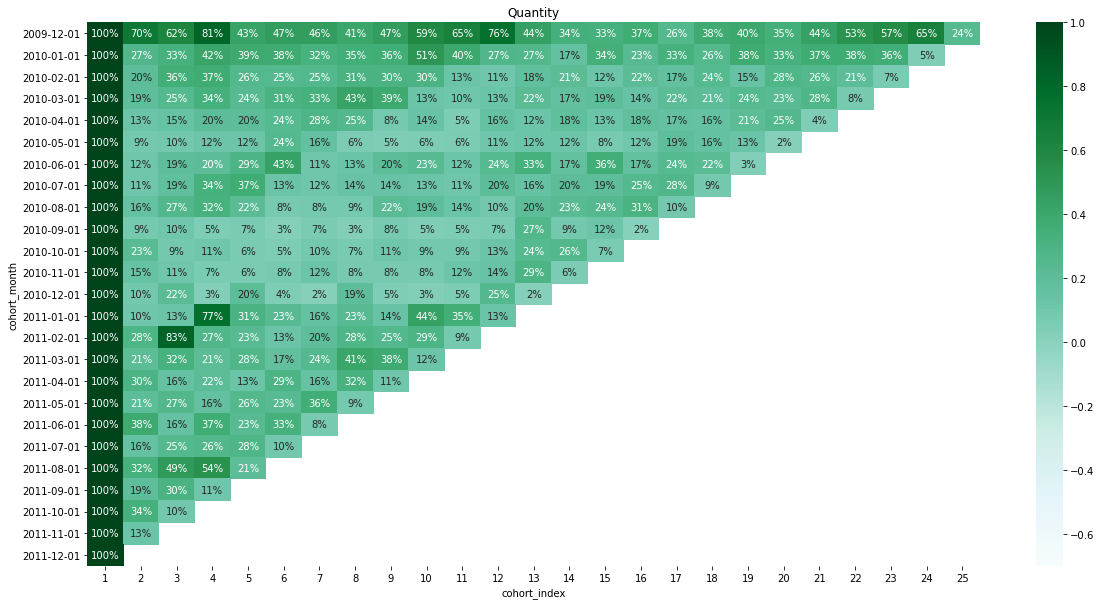

In [156]:
plt.figure(figsize=(20,10))
plt.title('Quantity')
sns.heatmap(quantity_retention,
            annot=True,
            fmt='.0%',
            vmin=-0.7,
            vmax=1,
           cmap='BuGn')

>From the first cohort the store maintains selling the almost 65% of its quantity after 24 months after which it drops for some reason 

[Back to Menu](#menu)

<a id=rfm></a>
### Recency, Frequency, Monetary Value

> Recency, Frequency and Monetary value for each customer.  We want our customer to be recent and active   
Recency: means number of days since the last transaction  
frequency: means number of transactions in the past period, for me 2 years  
monetary value: means how much the customer has spent int total. This represents the customer's value which is calculated by how much they spend.


In [48]:
#first copy dataframe
df = data.copy()
df.shape

(770386, 17)

In [49]:
print('min date: {},max date: {}'.format(df.InvoiceDate.min(),df.InvoiceDate.max()))

min date: 2009-12-01 07:45:00,max date: 2011-12-09 12:50:00


>I'll create a hypothetical date to represent current date, so I will take the highest date and add one day to it. This data represents the current date on which we do the analysis

In [50]:
snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

>Create a dataframe for recency, activity and revenue for each customer. Recency measures the days since most recent invoice, Invoice measures the number of invoices per customer, which is activity, and Revenue measures the sum of all revenue per customer.


In [80]:
data_rfm = df.groupby('Customer ID').agg({\
                                          'InvoiceDate': lambda x: (snapshot_date - max(x)).days,\
                                           'Invoice': 'count',\
                                           'Revenue': 'sum'})
data_rfm.head()

,InvoiceDate,Invoice,Revenue
Customer ID,,,
12346.0,529,24,169.36
12347.0,2,222,4921.53
12348.0,75,46,1658.40
12349.0,19,172,3678.69
12350.0,310,16,294.40


In [81]:
#rename some columns
data_rfm.rename(columns={'InvoiceDate':'Recency',\
                       'Invoice': 'Frequency',\
                        'Revenue':'MonetaryValue'},inplace=True)
print(data_rfm.shape)
data_rfm.head()

(5834, 3)


,Recency,Frequency,MonetaryValue
Customer ID,,,
12346.0,529,24,169.36
12347.0,2,222,4921.53
12348.0,75,46,1658.40
12349.0,19,172,3678.69
12350.0,310,16,294.40


>- Now I have to give the customers labels according to their recency, frequency and monetary value. I do this by calculating the quartiles for eah customer.
>- Recency: measures days since last transaction, so customers who have been active more recently will be rated better than less recent ones. 
>- So the dataframe will be sorted  into 4 quanrtiles from 1 to 4 by the recency of customers, 4 being more recent

In [82]:
labels = range(4,0,-1)
recency_q = pd.qcut(data_rfm['Recency'],q=4,labels=labels)
data_rfm['R'] = recency_q.values
data_rfm.head()

,Recency,Frequency,MonetaryValue,R
Customer ID,,,,
12346.0,529,24,169.36,1
12347.0,2,222,4921.53,4
12348.0,75,46,1658.40,3
12349.0,19,172,3678.69,4
12350.0,310,16,294.40,2


In [83]:
#the higher frequency the better
labels_f = range(1,5)
frequency_q = pd.qcut(data_rfm['Frequency'],q=4,labels = labels_f)
data_rfm = data_rfm.assign(F = frequency_q.values)

In [84]:
data_rfm.head()

,Recency,Frequency,MonetaryValue,R,F
Customer ID,,,,,
12346.0,529,24,169.36,1,2
12347.0,2,222,4921.53,4,4
12348.0,75,46,1658.40,3,2
12349.0,19,172,3678.69,4,4
12350.0,310,16,294.40,2,1


In [85]:
#higher monetary value is better
labels_m = range(1,5)
mon_val_q = pd.qcut(data_rfm['MonetaryValue'],q=4, labels = labels_m)
data_rfm['M'] = mon_val_q.values
data_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
12346.0,529,24,169.36,1,2,1
12347.0,2,222,4921.53,4,4,4
12348.0,75,46,1658.40,3,2,3
12349.0,19,172,3678.69,4,4,4
12350.0,310,16,294.40,2,1,1


>Now I want to concatenate the three values R,F, and M


In [95]:
data_rfm.R*100

Series([], Name: R, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1])

In [98]:
#function that takes the values and concatenates them
def concat_rfm(df):
    #return str(df.R)+str(df.F)+str(df.M)
    return df.R*100 + df.F*10 +df.M

data_rfm['RFM_segment'] = data_rfm.apply(concat_rfm,axis=1)
data_rfm.head()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
Customer ID,,,,,,,
12346.0,529,24,169.36,1,2,1,121
12347.0,2,222,4921.53,4,4,4,444
12348.0,75,46,1658.40,3,2,3,323
12349.0,19,172,3678.69,4,4,4,444
12350.0,310,16,294.40,2,1,1,211


In [99]:
#sum up the values
data_rfm['RFM_score'] = data_rfm[['R','F','M']].sum(axis=1)
data_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
Customer ID,,,,,,,,
12346.0,529,24,169.36,1,2,1,121,4
12347.0,2,222,4921.53,4,4,4,444,12
12348.0,75,46,1658.40,3,2,3,323,8
12349.0,19,172,3678.69,4,4,4,444,12
12350.0,310,16,294.40,2,1,1,211,4


In [251]:
#data_rfm.to_clipboard()

In [109]:
#select top 5 customers with lowest rfm segment of 111
data_rfm[data_rfm.RFM_segment==111].iloc[:5]

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
Customer ID,,,,,,,,
12387.0,415,9,143.94,1,1,1,111,3
12392.0,591,7,234.75,1,1,1,111,3
12400.0,414,11,205.25,1,1,1,111,3
12416.0,657,11,202.56,1,1,1,111,3
12460.0,456,17,296.65,1,1,1,111,3


In [110]:
#the number of customers is
data_rfm.shape[0]

5834

In [111]:
#save file 
data_rfm.to_csv(data_path + '/rfm_data.csv')


In [112]:
data_rfm.to_pickle(data_path + '/rfm_data.pkl')

In [113]:
#sort and see 10 largest rfm segments
data_rfm['RFM_segment'].value_counts()[:10]

444    610
111    532
344    341
211    294
122    254
222    241
333    239
233    238
433    203
322    193
Name: RFM_segment, dtype: int64

In [114]:
#summary statistics
data_rfm.groupby('RFM_score').agg({\
                                    'Recency':'mean',
                                     'Frequency':'mean',
                                     'MonetaryValue':['mean','count']}).round(2)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_score                                      
3          543.28      9.66        172.87   532
4          375.53     16.87        243.15   564
5          313.80     24.68        411.33   631
6          232.13     34.49        642.85   608
7          190.35     50.72       1027.44   626
8          149.61     72.92       1309.02   613
9           97.45    109.17       2038.32   546
10          67.18    167.85       3049.94   570
11          35.95    274.10       4834.94   534
12          10.07    559.16      14359.42   610

>It is more intuitive if the rfm segments were given names like gold, silver and bronze. I will create a function that takes a dataframe and returns segements' labels gold, silver or bronze according to their segment score

In [115]:
def label_segments(df):
    if df['RFM_score'] >= 9:
        return 'Gold'
    elif (df['RFM_score'] < 9) and (df['RFM_score']>= 5): #and :
        return 'Silver'
    else:
        return 'Bronze'

In [116]:
data_rfm['segment_label'] = data_rfm.apply(label_segments,axis=1)
data_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,segment_label
Customer ID,,,,,,,,,
12346.0,529,24,169.36,1,2,1,121,4,Bronze
12347.0,2,222,4921.53,4,4,4,444,12,Gold
12348.0,75,46,1658.40,3,2,3,323,8,Silver
12349.0,19,172,3678.69,4,4,4,444,12,Gold
12350.0,310,16,294.40,2,1,1,211,4,Bronze


In [117]:
#now get the summary stats for these labels
data_rfm.groupby('segment_label').agg({
                    'Recency':'mean',
                    'Frequency':'mean',
                    'MonetaryValue':['mean','count']
}).round(2)

Recency Frequency MonetaryValue      
                 mean      mean          mean count
segment_label                                      
Bronze         456.96     13.37        209.04  1096
Gold            51.70    284.40       6279.87  2260
Silver         221.96     45.60        845.85  2478

>The threshold for gold, silver and bronze was chosen arbitrarily, but there is a better way to better cluster customers. Businesses use clustering for customer segmentation. The clustering results segment customers into groups with similar purchase histories, which businesses can then use to create targeted advertising campaigns.
Kmeans clustering is the easiest and most used unsupervised learning method to do this. Kmeans clustering is going to be done in the notebook called Modeling

[Back to Menu](#menu)


In [118]:
data_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,segment_label
Customer ID,,,,,,,,,
12346.0,529,24,169.36,1,2,1,121,4,Bronze
12347.0,2,222,4921.53,4,4,4,444,12,Gold
12348.0,75,46,1658.40,3,2,3,323,8,Silver
12349.0,19,172,3678.69,4,4,4,444,12,Gold
12350.0,310,16,294.40,2,1,1,211,4,Bronze


In [119]:
#save dataframe to file
data_rfm.to_csv(data_path+'/rfm_data.csv')

<a id='summary'></a>
### Summary:
- customer cohorts were created by calculating the number of months between purchases for each customer and then customers are grouped into groups according to their first purchase month.
- RFM score is calculated for each customer
    1. create a fictitious date to do the analysis on which is the max date +1
    2. create dataframe with the count of days since last purchase, count of purchases and sum spent for each customer
    3. these three scores are concatenated and then summed
    4. Then I can get the size of each segment and get summary stats to see how the business is doing
    5. After I gave segments Gold, Silver or Bronze labels for easy reading.   

Next instead of arbitrary labels, I will use clustering algorithm

[Back to Menu](#menu)